# Support Vector Machines

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\tania\Desktop\winefraud.csv")

In [3]:
df.head(5)   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.shape

(6497, 13)

In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

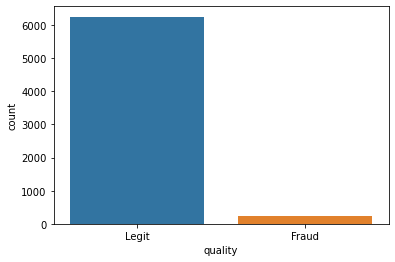

In [6]:
#Create a countplot that displays the count per category of Legit vs Fraud. 
sns.countplot(x='quality',data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

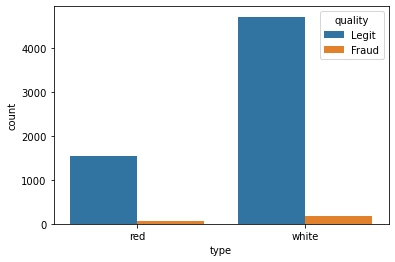

In [7]:
#Create a countplot that has the wine type on the x axis with the hue separating columns by Fraud vs Legit.
sns.countplot(x='type',hue='quality',data=df)

In [8]:
#What percentage of red wines and white vines are Fraud?
reds = df[df["type"]=='red']
whites = df[df["type"]=='white']

In [9]:
#print percentage
print("Percentage of fraud in Red Wines:")
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))

Percentage of fraud in Red Wines:
3.9399624765478425


In [10]:
print("Percentage of fraud in White Wines:")
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

Percentage of fraud in White Wines:
3.7362188648427925


Calculate the correlation between the various features and the "quality" column.

In [11]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [12]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

Machine Learning Model

In [13]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [14]:
df = df.drop('Fraud',axis=1)

In [15]:
#Separate out the data into X features and y target label
X = df.drop('quality',axis=1)
y = df['quality']

In [16]:
#Perform a Train|Test split on the data, with a 10% test size.
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
#Scale the X train and X test data.
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC(class_weight='balanced')

GridSearchCV to run a grid search for the best C and gamma parameters

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1]}
grid = GridSearchCV(svc,param_grid)

In [25]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [26]:
grid.best_params_

{'C': 1}

confusion matrix and classification report for the model

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
grid_pred = grid.predict(scaled_X_test)

In [29]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)